# Dimension Reduction

## Principal Components Analysis
A dataset that contains information about some factors for each country is used for the year 2019.
The dataset can be found in https://www.kaggle.com/unsdsn/world-happiness. 

### Data cleaning
First load the data and show the first rows. 

In [1]:
#Insert your code here

In [2]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [3]:
#Load data
import pandas as pd
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Show the columns

In [4]:
#Insert your code here

In [5]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [6]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Check if there are outliers 

In [7]:
#Insert your code here

In [8]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [9]:
print(df.shape)
df.isnull().sum()

(156, 9)


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### Correlation matrix

A correlation matrix shows how variables relate to each other by the correlation matrix.   
  
Show a heatmap for the correlation matrix. 


In [10]:
#Insert your code here

In [11]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

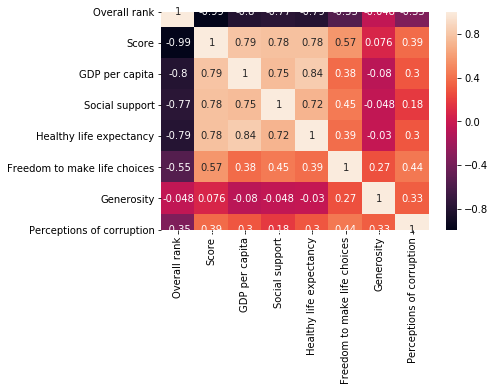

In [12]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)

### Find the PCs
Find the Principal Components that represent 80% of the variance of the data. 
First, we need to define which are the features and the target variables for this problem.
Then, scale the data and finally find the components. 

In [13]:
#Insert your code here

In [14]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [15]:
features = df.drop(['Country or region', 'Overall rank'], axis=1)
%pylab inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(features.values)
pca = PCA(random_state=0)
pca.fit(x)

Populating the interactive namespace from numpy and matplotlib


PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

### Scree plot
By plotting the cumulative explained variance when while changing the number of components, we can see when the variances reachers a threshold that we think that is enough to explain the data. And, in this way determine the number of components that are neccesary.  
 
Thus, plot the cumulative explained_variance_ratio and find the number of components that explains the 80% of the data.   

In [16]:
#Insert your code here

In [17]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

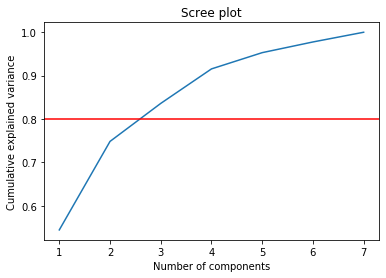

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import combinations
threshold=0.8
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Scree plot')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()

From the graph, we can see that the desired threshold is reached with 3 components. To the get exact value, we can see the vector for the comulative explained variance ratio. While with 2 components it can be explained around 75%, with 3 it is explained 84%. 

In [19]:
#Insert your code here

In [20]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.54464917, 0.74852619, 0.83608123, 0.91555369, 0.95299697,
       0.97761213, 1.        ])

Define a variable that corresponds to the number of components 

In [22]:
#Insert your code here

In [23]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [24]:
#determine number of components with threshold=0.8
n_components=np.where(np.cumsum(pca.explained_variance_ratio_)>0.8)[0][0]+1

#Print explained variance
np.cumsum(pca.explained_variance_ratio_)[n_components-1]

0.8360812259075627

### Interpretation 
Now that the number of components is defined, we can see the importance of each variable for the first 3 components.  

From the values of the PCs, we can conclude that:
- PC1 represents "Poor" countries  
- PC2 represents "Generous" countries
- PC3 represents "Corrupted" countries 

This is totally subjective, so you can find another definition for the components.

Observation: The Perception of Corruption Index is measure on a scale from 100 (clean) to 0 (highly corrupted).

In [25]:
#Insert your code here

In [26]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [27]:
pca = PCA(n_components=n_components)
pcs = pca.fit(x)
pd.DataFrame(data=pcs.components_, columns = features.columns, index=['PC1', 'PC2', 'PC3'])

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
PC1,-0.475861,-0.454825,-0.436582,-0.450150,-0.332201,-0.048233,-0.246511
PC2,-0.028371,-0.213377,-0.207148,-0.177856,0.362130,0.693809,0.516346
PC3,0.071505,-0.049598,0.258645,0.000873,0.106359,0.577009,-0.762416


Plot the information of the components pcs._components to see the importance of each variable for each component

In [28]:
#Insert your code here

In [29]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

/Users/rootstrap/Documents/ml-training/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


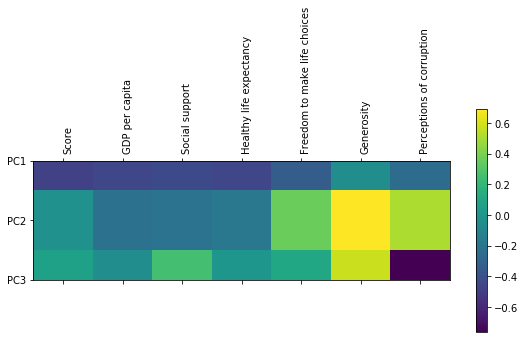

In [30]:
components_range = np.arange(1, n_components+1, 1)
components_names = list(map(lambda x: 'PC' + str(x), components_range))
plt.matshow(pcs.components_,cmap='viridis')
plt.yticks(range(0,n_components), components_names,fontsize=10)
plt.colorbar()
plt.xticks(range(0,len(features.columns)),features.columns,rotation=90,ha='left')
plt.tight_layout()
plt.show()

Fit the data to the PCA with the obtained number of components

In [31]:
#Insert your code here

In [32]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [33]:
pca = PCA(n_components=n_components)
pcs = pca.fit(x)
pd.DataFrame(data=pcs.components_, columns = features.columns, index=['PC1', 'PC2', 'PC3'])

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
PC1,-0.475861,-0.454825,-0.436582,-0.450150,-0.332201,-0.048233,-0.246511
PC2,-0.028371,-0.213377,-0.207148,-0.177856,0.362130,0.693809,0.516346
PC3,0.071505,-0.049598,0.258645,0.000873,0.106359,0.577009,-0.762416


Create a new dataframe from the result of fit_transform and concat the Country of region variable.

In [1]:
pca_df = pd.DataFrame(data = pca.fit_transform(x), columns = components_names)
pca_df = pd.concat([pca_df, df['Country or region']], axis = 1)
pca_df.head()

NameError: name 'pd' is not defined

### Scatter plot
By a scatter plot we can visualize the relationship between 2 components. And analyze if the points are grouped in a certain way.   
   
Using the dataframe created before (pca_df) show 3 graphs that compares: 
- PC1 and PC2
- PC1 and PC3
- PC2 and PC3

In [35]:
#Insert your code here

In [36]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

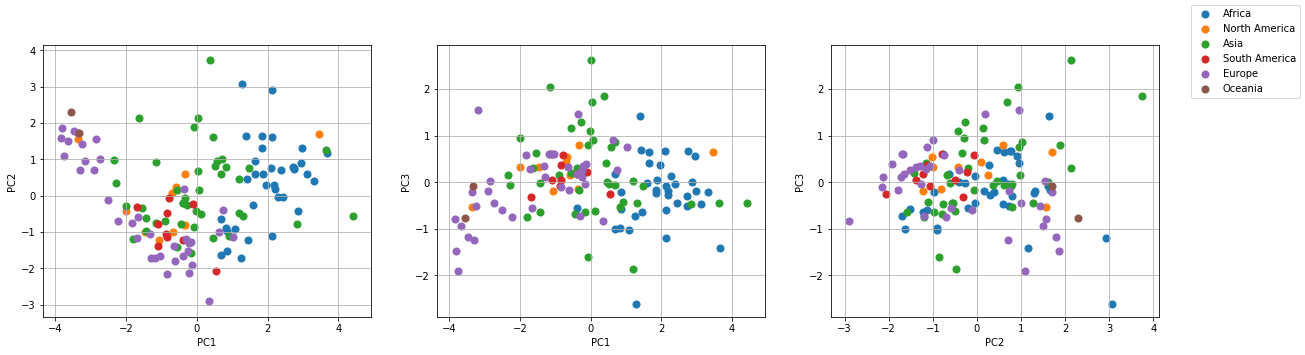

In [37]:
import geopandas
import seaborn as sns

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
merged_inner = pd.merge(left=world, right=pca_df, left_on='name',right_on='Country or region', how='inner')
targets = merged_inner.continent.unique()
colors = sns.color_palette("hls", len(targets))

def draw_components(ax, targets, colors, names, df):
    ax.set_xlabel(names[0])
    ax.set_ylabel(names[1])
    for target, color in zip(targets,colors):
        indicesToKeep = df['continent'] == target
        ax.scatter(df.loc[indicesToKeep, names[0]]
                   , df.loc[indicesToKeep, names[1]]
                   , cmap = colors
                   , s = 50)
    ax.grid()
    return ax

fig, axs = plt.subplots(1,3, figsize=(20, 5))
draw_components(axs[0],targets, colors, ['PC1','PC2'], merged_inner)
draw_components(axs[1],targets, colors, ['PC1','PC3'], merged_inner)
draw_components(axs[2],targets, colors, ['PC2','PC3'], merged_inner)
fig.legend(targets)
plt.show()


Graph 1: PC1 vs PC2 
- We can see that Africa has high PC1, which means that countries from Africa are Poor.
- Countries that have very very low PC1, that are rich, are generous.
- Countries that are in the middle, are not rich and are not poor, are not generous. 

Graph 2: PC1 vs PC3
In this graph we can see the division between reach and poor again, but for the corruption is very spread. Seems that there is not correlation between these 2 components. A country might be poor but corrupted or not. 

Graph 3: PC2 vs PC3
This graph compares PC3(corruption) and PC2(generosity), we can can see that most of the countries are concentrated in the middle, which means that have some level of corruption and are not very generous.   
There are some exceptions:   
- 2 countries from Africa that are very genereous and not corrupted.
- 2 countries from Asia that are very generous but very corrupted.    


### Validate
We can see if our definition of the principal components makes sense by drawing a world map and coloring the principal components. Comparing the two graphs are very similar. Thus, the definition of the principal components might be right.   

Create 2 world maps using geopandas library to color the principal components. One map corresponds to the dataframe related to the result of transform and the other map would be from the original data.    

In [38]:
#Insert your code here

In [39]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

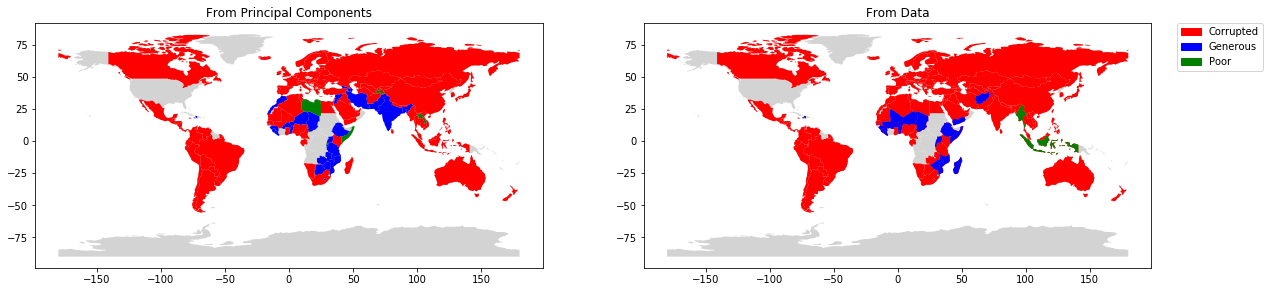

In [40]:
merged_inner['pc'] = np.where(merged_inner['PC1'] > merged_inner['PC2'], 'PC1', 'PC2')
merged_inner['pc'] = np.where(merged_inner['PC3'] > merged_inner['PC1'], 'PC3', merged_inner['pc'])
merged_inner['pc'] = np.where(merged_inner['PC3'] > merged_inner['PC2'], 'PC3', merged_inner['pc'])
pc1 = merged_inner[merged_inner['pc']=='PC1']
pc2 = merged_inner[merged_inner['pc']=='PC2']
pc3 = merged_inner[merged_inner['pc']=='PC3']

cmap = cm.get_cmap('Spectral')
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 5))
world.plot(color='lightgrey', ax=ax1)
pc1.plot(ax=ax1, color='blue', label='PC1')
pc2.plot(ax=ax1, color='green', label='PC2')
pc3.plot(ax=ax1, color='red', label='PC3')
ax1.set_title('From Principal Components')

df_merged = pd.merge(left=world, right=df, left_on='name',right_on='Country or region', how='inner')
generous_countries = df_merged[df_merged['Generosity'] > 0.4]
corrupted_countries = df_merged[df_merged['Perceptions of corruption'] < 0.4]
poor_countries = df_merged[df_merged['GDP per capita'] < 0.4]

world.plot(color='lightgrey', ax=ax2)
corrupted_countries.plot(ax=ax2, color='red', label='PC3')
generous_countries.plot(ax=ax2, color='green', label='PC2')
poor_countries.plot(ax=ax2, color='blue', label='PC1')
ax2.set_title('From Data')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='The red data')
blue_patch = mpatches.Patch(color='blue', label='The blue data')
green_patch = mpatches.Patch(color='green', label='The green data')
plt.legend(handles=[red_patch, blue_patch, green_patch], labels=['Corrupted', 'Generous', 'Poor'], 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Biplot
By drowing a biplot we can see the relationship between components and variables.  
Create a function to create a biplot between 2 components.   
 

In [41]:
#Insert your code here

In [42]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [43]:
def biplot(scores,coeff,pca_1,pca_2,figsize, labels=None):
    pca_1_index = pca_1 -1
    pca_2_index = pca_2 -1
    x = scores[:,pca_1_index]
    y = scores[:,pca_2_index]
    n=coeff.shape[1]
    scale_x = 1.0/(x.max() - x.min())
    scale_y = 1.0/(y.max() - y.min())
    plt.figure(figsize=figsize)
    plt.scatter(x*scale_x,y*scale_y)
    for i in range(n-1):
        plt.arrow(0, 0, coeff[pca_1_index, i], coeff[pca_2_index, i],color='red',alpha=0.5) 
        if labels is None:
            plt.text(coeff[pca_1_index, i]* 1.15, coeff[pca_2_index, i] * 1.15, str(i+1), color='black', ha='center', va='center')
        else:
            plt.text(coeff[pca_1_index, i]* 1.15, coeff[pca_2_index, i] * 1.15, labels[i], color='black', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pca_1))
    plt.ylabel("PC{}".format(pca_2))
    plt.grid()
    #plt.savefig("PC{}_PC{}".format(pca_1, pca_2), dpi=fig.dpi)
    plt.show()
   

#### PC1 vs PC2
Pesent the graphs for the possible combinations for the components PC1 and analyze the results. 

In [44]:
#Insert your code here

In [45]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

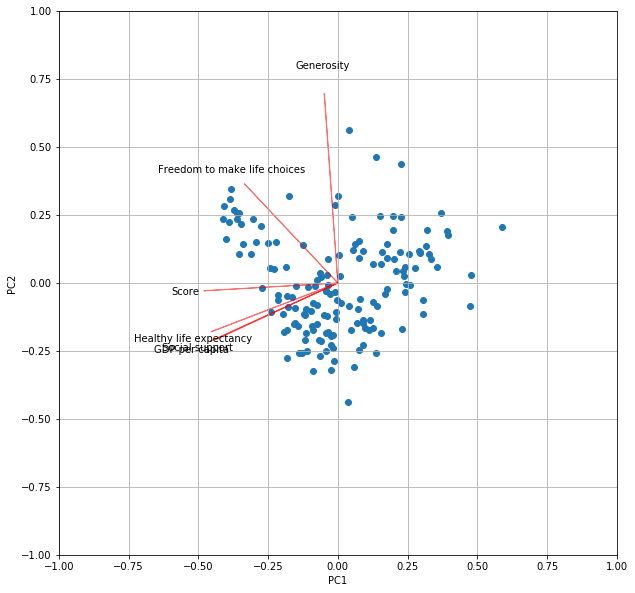

In [46]:
scores = pca.transform(x)
biplot(scores,pcs.components_,1,2,(10,10),labels=features.columns)


- If you look at the ‘Generosity’ arrow, it is the most important factor for PC2, and it points towards high values of PC2, so we know the higher the value of PC2, the higher the ‘Generosity’. 
- We can see that 'Healthy life expectancy' is related with 'Social Support' and 'GDP per capita' since the arrows for those variables are nearby, therefore the angle between them is small. In addition, if those values are small, PC2 tends to be small. In contrast, when those variables are small PC1 is bigger.  
- We can see also that the most correlated variable with Generosity is Freedom to make choices and it is related with higher values for PC2. 
- From the points, we can see that there is no clear relationship between the two components, since the points are disperse on the space. 

#### PC2 vs PC3
Present the graph for components 2 and 3 and analyze the results. 

In [47]:
#Insert your code here

import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')#Insert your code here

In [48]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

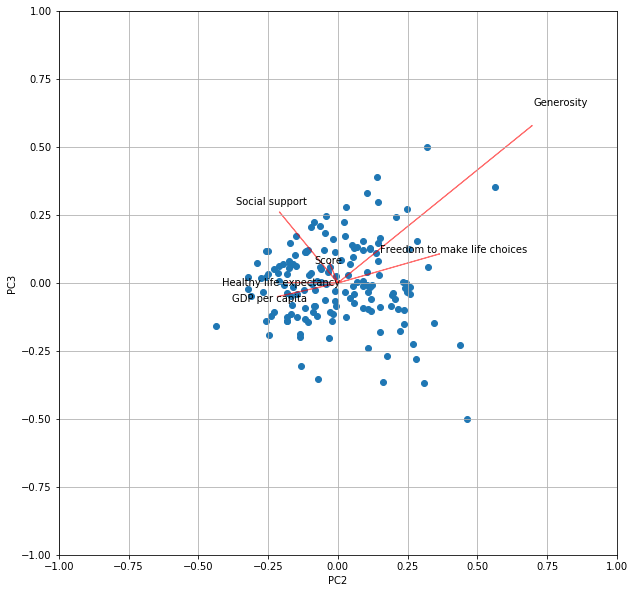

In [49]:
biplot(scores,pcs.components_,2,3,(10,10),labels=features.columns)


- Generous countries might be corrupted (when PC2 and PC3 are high), but there is no clear relationship between the two components because the points are around the center. It means that in general countries have an average index for corruption and generosity. Although there are some dots that are different from the rest, when one of the components is high.
- In this graph we can also see that Countries where there is Freedom to make life choices are more likely to have higher Generosity index   


#### PC1 vs PC3
Present the biplot for PC1 and PC3 and analyze the results. 

In [50]:
#Insert your code here

In [51]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

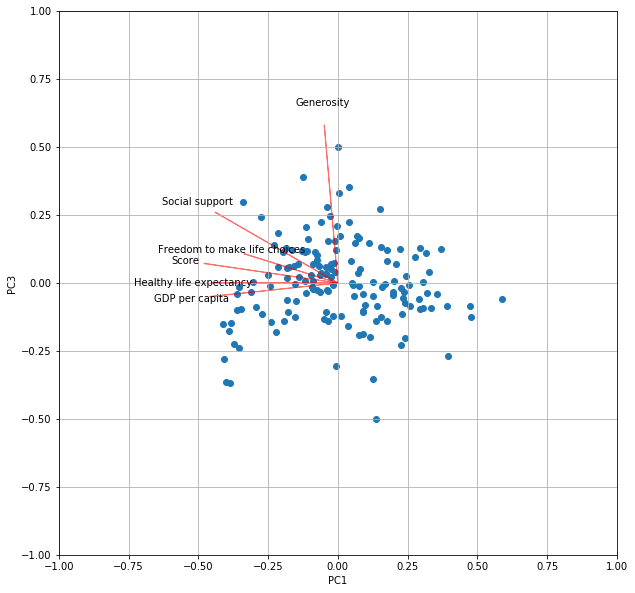

In [52]:
biplot(scores,pcs.components_,1,3,(10,10),labels=features.columns)


- From this graph we cannot conclude anything else rather things that we already said. 
- The dots are spread in the space, so there is not a relationship between the two components.

# TSNE

Use digits data from sklearn.datasets in order to show how to represent high dimensional data into 2 dimensions graphically using TSNE from sklearn.manifold.


In [53]:
#Insert your code here

In [54]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import numpy as np
digits = load_digits()
print(digits.target)
print(digits.data)
tsne = TSNE(n_components=2, random_state=0)
tsne_result= tsne.fit_transform(digits.data)
tsne_df = pd.DataFrame({'X':tsne_result[:,0],
                        'Y':tsne_result[:,1],
                        'digit':digits.target})


tsne_df.head()

[0 1 2 ... 8 9 8]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


,X,Y,digit
0,75.666435,0.064290,0
1,3.888909,-14.375434,1
2,2.615124,13.298235,2
3,-18.941391,39.707829,3
4,12.742740,-45.304092,4


Plot the results into a scatterplot, coloring by digit variable. 

In [56]:
#Insert your code here

In [57]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

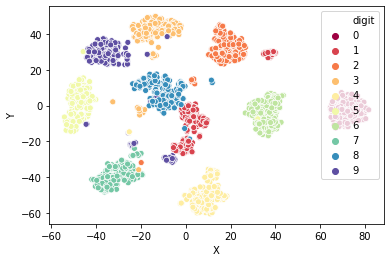

In [58]:
sns.scatterplot(x="X", y="Y",
              hue="digit",
              legend ="full",
              palette='Spectral',
              data=tsne_df)
plt.show()